# Covid Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
covidDf = pd.read_csv('covidData.csv')

In [3]:
covidDf.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# The describe returns all the aritimatic data. 
covidDf.describe(include = "all")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,246016,232186,246016,246016,2.319360e+05,2.316500e+05,2.304490e+05,2.124750e+05,212386.000000,211200.000000,...,147826.000000,97419.000000,176146.000000,225689.000000,193095.000000,2.449600e+05,8.215000e+03,8215.000000,8254.000000,8215.000000
unique,248,6,248,1093,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Europe,Mexico,2021-10-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1093,56312,1093,247,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.925357e+06,1.213391e+04,1.216514e+04,7.736586e+04,130.789054,131.377401,...,32.816428,50.883089,3.087853,73.608159,0.724645,1.407589e+08,5.024999e+04,10.118616,14.099180,1441.108602
std,NaN,NaN,NaN,NaN,3.052021e+07,8.351676e+04,8.150995e+04,3.956815e+05,705.911254,691.585969,...,13.537433,31.871399,2.551122,7.446680,0.149596,6.923074e+08,1.382689e+05,13.333355,25.892159,1805.727888
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,NaN,NaN,NaN,NaN,5.142000e+03,0.000000e+00,5.286000e+00,1.200000e+02,0.000000,0.000000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,6.055000e+01,0.830000,0.082500,40.384378
50%,NaN,NaN,NaN,NaN,5.731700e+04,4.400000e+01,8.514300e+01,1.286000e+03,0.000000,1.286000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.465400e+03,7.720000,7.415000,877.096776
75%,NaN,NaN,NaN,NaN,5.925458e+05,8.890000e+02,1.067143e+03,1.052350e+04,12.000000,14.429000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.651575e+04,15.820000,19.150000,2300.905648


In [5]:
cleanedCovid = covidDf.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=False)
print (cleanedCovid.shape)
print(covidDf.shape)

(246016, 64)
(246016, 67)


In [6]:
cleanedCovid.rename(columns={'date': 'Date','location':'Country','continent': 'Continent','iso_code':'ISO_code'},inplace=True)
cleanedCovid.head(5)

,ISO_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
continents = list(cleanedCovid.Continent.unique())
continents

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [8]:
#Instead of dropping all the columns that are not needed, let's just group by the ones that is needed. 

In [9]:
subsetCovid = cleanedCovid.groupby(['Date','Country','total_cases','total_deaths','total_vaccinations']).sum().reset_index()
subsetCovid.head(5)

,Date,Country,total_cases,total_deaths,total_vaccinations,new_cases,new_cases_smoothed,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-12-02,Europe,17718053.0,426211.0,0.0,206143.0,199925.857,5373.0,268.426,572.243,...,0.000,0.00,0.000,0.00,0.000,7.448078e+08,0.0,0.0,0.0,0.0
1,2020-12-02,High income,30620978.0,679314.0,0.0,363925.0,328896.429,7244.0,263.009,543.228,...,0.000,0.00,0.000,0.00,0.000,1.250515e+09,0.0,0.0,0.0,0.0
2,2020-12-02,Norway,36969.0,351.0,0.0,378.0,385.857,17.0,71.004,64.589,...,20.700,0.00,3.600,82.40,0.957,5.434324e+06,0.0,0.0,0.0,0.0
3,2020-12-02,World,64673677.0,1569653.0,0.0,640266.0,592709.571,12390.0,74.320,196.819,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,0.0,0.0,0.0,0.0
4,2020-12-03,Europe,17942572.0,431850.0,0.0,224519.0,197673.000,5639.0,265.401,579.814,...,0.000,0.00,0.000,0.00,0.000,7.448078e+08,0.0,0.0,0.0,0.0


In [10]:
imputer = SimpleImputer(strategy='constant')
subsetCovidCleaning = pd.DataFrame(imputer.fit_transform(subsetCovid),columns=subsetCovid.columns)
subsetCovidCleaning['total_cases'].replace({'missing_value': 0}, inplace = True)
subsetCovidCleaning['total_deaths'].replace({'missing_value': 0}, inplace = True)
subsetCovidCleaning['new_deaths'].replace({'missing_value': 0}, inplace = True)
subsetCovidCleaning['total_vaccinations'].replace({'missing_value': 0}, inplace = True)
subsetCovidCleaning

,Date,Country,total_cases,total_deaths,total_vaccinations,new_cases,new_cases_smoothed,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-12-02,Europe,17718053.0,426211.0,0.000000e+00,206143,199926,5373.0,268.426,572.243,...,0,0,0,0,0,7.44808e+08,0,0,0,0
1,2020-12-02,High income,30620978.0,679314.0,0.000000e+00,363925,328896,7244.0,263.009,543.228,...,0,0,0,0,0,1.25051e+09,0,0,0,0
2,2020-12-02,Norway,36969.0,351.0,0.000000e+00,378,385.857,17.0,71.004,64.589,...,20.7,0,3.6,82.4,0.957,5.43432e+06,0,0,0,0
3,2020-12-02,World,64673677.0,1569653.0,0.000000e+00,640266,592710,12390.0,74.32,196.819,...,34.635,60.13,2.705,72.58,0.737,7.97511e+09,0,0,0,0
4,2020-12-03,Europe,17942572.0,431850.0,0.000000e+00,224519,197673,5639.0,265.401,579.814,...,0,0,0,0,0,7.44808e+08,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65839,2022-12-28,South America,66647237.0,1340757.0,9.431684e+08,55332,53638.7,408.0,122.795,3069.38,...,0,0,0,0,0,4.36817e+08,0,0,0,0
65840,2022-12-28,Taiwan,8766272.0,15145.0,6.467305e+07,28158,20227.4,25.0,846.57,633.857,...,0,0,0,80.46,0,2.38934e+07,0,0,0,0
65841,2022-12-28,Upper middle income,142615232.0,2511307.0,5.380033e+09,59495,62214.6,494.0,24.63,994.214,...,0,0,0,0,0,2.52592e+09,0,0,0,0
65842,2022-12-28,Uruguay,1011988.0,7562.0,8.762226e+06,0,0,0.0,0,2209.3,...,19.9,0,2.8,77.91,0.817,3.4228e+06,0,0,0,0


Total countries where the total death is greather than 1000000.

In [11]:
death = subsetCovidCleaning[subsetCovidCleaning['total_deaths']>1000000]
countries = death['Country'].unique()

There are total 8 unique countries: 
- 'World'
- 'High income'
- 'Upper middle income'
- 'Europe'
- 'South America'
- 'Asia'
- 'Lower middle income'
- 'North America'
- 'European Union'
- 'United States'

The goal is now to show the trend of total deaths, cases and vaccinations of these 8 countries. 

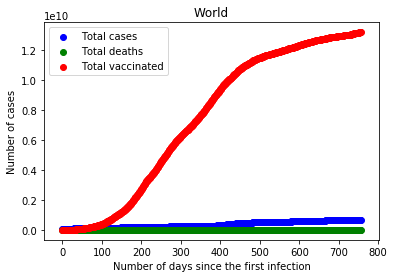

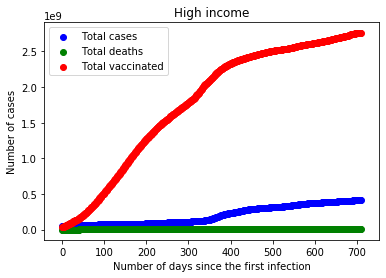

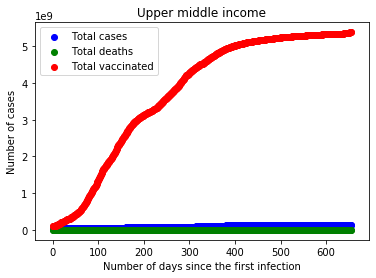

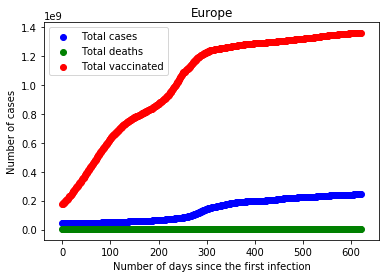

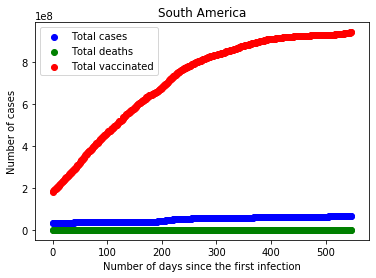

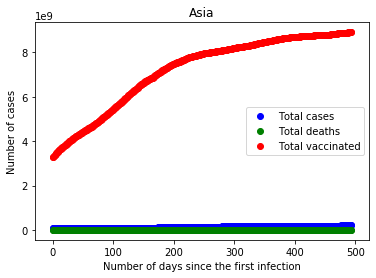

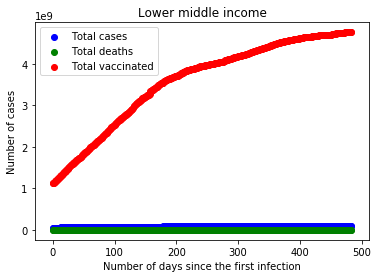

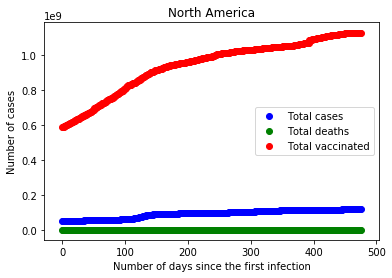

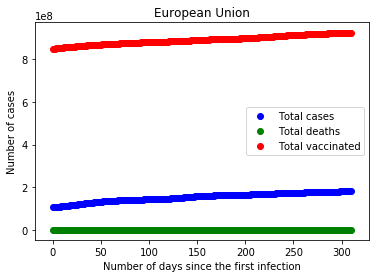

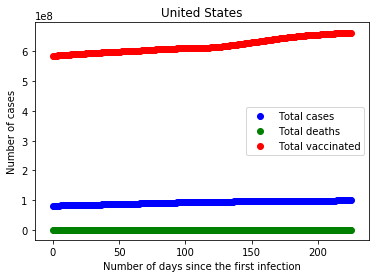

In [13]:
for countryIdx in range(0, len(countries)):
    c = death[death['Country'] == countries[countryIdx]].reset_index()
    plt.scatter(np.arange(0,len(c)), c['total_cases'], color = 'blue', label = "Total cases")
    plt.scatter(np.arange(0,len(c)), c['total_deaths'], color = 'green', label = "Total deaths")
    plt.scatter(np.arange(0,len(c)), c['total_vaccinations'], color = 'red', label = "Total vaccinated")
    plt.title(countries[countryIdx])
    plt.xlabel("Number of days since the first infection")
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()

In [ ]:
subset = death.groupby(['Country']).sum().reset_index()
subset.head(5)
plt.scatter(np.arange(0,len(subset)),subset['total_cases'], color = "blue", label ="total cases")
plt.scatter(np.arange(0,len(subset)),subset['total_deaths'], color = "red", label ="total deaths")
plt.xlabel("Number of days since the first infection")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [ ]:
date = death['Date'].unique()
subsetDate = death.groupby(['Date']).sum().reset_index()
plt.scatter(np.arange(0,len(date)), subsetDate['total_cases'], color = "blue", label = "total_cases")
plt.scatter(np.arange(0,len(date)), subsetDate['total_deaths'], color = "red", label = "total_deaths")
plt.title("Date")
plt.xlabel("Number of days since the first infection")
plt.ylabel("Total number of days")
plt.legend()
plt.show()